# Pandas: Introducción

**Documentación oficial:** https://pandas.pydata.org/docs/

**Pandas tiene 3 funciones básicas:**
1. Adquisición de información (Lectura de distintos formatos y descargas de tablas HTML).
2. Manipulación de datos a través de objetos llamados DataFrames.
3. Exportación de DataFrames en distintos formatos.

## Pandas Series

Es un arreglo 1-Dimensional para datos homogéneos (es muy parecido a una tupla pero permite mutabilidad)

In [1]:
import pandas as pd
import numpy as np

### Creando una serie

In [2]:
flavors=pd.Series(["Chocolate", "Vanilla", "Strawberry","Rum Raisin"])
print(flavors)
print(type(flavors))

0     Chocolate
1       Vanilla
2    Strawberry
3    Rum Raisin
dtype: object
<class 'pandas.core.series.Series'>


La función de creación de series tiene varios paramétros que pueden ser modificados para permitir una mayor personalización. Dentro de los parentesis de una función si se presiona Shift+Tab se muestran los parametros de la función (solo funciona en Jupyter Notebook)
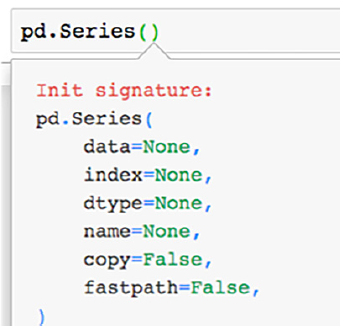

### Cambiando el índice

In [3]:
data = np.array(['g','e','e','k','s','f', 'o','r'])
ser = pd.Series(data,index=[10,11,12,13,14,15,16,17])
print(ser)
print(ser[16])

10    g
11    e
12    e
13    k
14    s
15    f
16    o
17    r
dtype: object
o


### Cambiando el tipo de datos

In [4]:
lucky_numbers = [4, 8, 15, 16, 23, 42]
print(pd.Series(lucky_numbers))
print(pd.Series(lucky_numbers, dtype = "float"))

0     4
1     8
2    15
3    16
4    23
5    42
dtype: int64
0     4.0
1     8.0
2    15.0
3    16.0
4    23.0
5    42.0
dtype: float64


### Introduciendo valores faltantes

In [5]:
temperatures = [94, 88, np.nan, 91]
pd.Series(data = temperatures)

0    94.0
1    88.0
2     NaN
3    91.0
dtype: float64

### Atributos de una serie

Los atributos de un objeto son usados con el nombre del objeto seguido de un punto y el nombre del atributo. Los atributos no son funciones por eso no requieren parametros.

In [6]:
ser.values

array(['g', 'e', 'e', 'k', 's', 'f', 'o', 'r'], dtype=object)

In [7]:
ser.index

Int64Index([10, 11, 12, 13, 14, 15, 16, 17], dtype='int64')

In [8]:
ser.size

8

In [9]:
ser.shape

(8,)

In [10]:
print(ser.is_unique) #Contiene valores repetidos
print(pd.Series(data = [3, 5]).is_unique)

False
True


### Métodos de una serie

Los métodos denotan la funcionalidad de cada objeto y son representados por funciones que son "heredadas" de la clase

In [11]:
ser

10    g
11    e
12    e
13    k
14    s
15    f
16    o
17    r
dtype: object

In [12]:
ser.head(3)

10    g
11    e
12    e
dtype: object

In [13]:
ser.tail(3)

15    f
16    o
17    r
dtype: object

In [14]:
numbers = pd.Series([1, 2, 3, np.nan, 4, 5])
numbers.count()

5

In [15]:
print(numbers.sum())
print(numbers.sum(skipna = False))

15.0
nan


In [16]:
numbers.sample(3)

4    4.0
5    5.0
1    2.0
dtype: float64

### Operaciones aritmeticas

In [17]:
s1 = pd.Series(data = [5, np.nan, 15], index = ["A", "B", "C"])
s1+3  ### s1.add(3)

A     8.0
B     NaN
C    18.0
dtype: float64

In [18]:
s1/4

A    1.25
B     NaN
C    3.75
dtype: float64

In [19]:
s1//4 ### Floor division

A    1.0
B    NaN
C    3.0
dtype: float64

In [20]:
s2 = pd.Series(data = [4, 8, 12, 14], index = ["B", "C", "D", "E"])
s1+s2

A     NaN
B     NaN
C    23.0
D     NaN
E     NaN
dtype: float64

## DataFrames

Es una arreglo 2-Dimensional que asemeja a una tabla de datos con filas y columnas

### Creando un Dataframe

In [21]:
### Se pueden crear dataframes de varias formas la más simple es usando diccionarios con listas pero también se pueden 
### usar arreglos de numpy o una lista de tuplas o bien a partir de una tabla externa
city_data = {
"City": ["New York City", "Paris", "Barcelona", "Rome"],
"Country": ["United States", "France", "Spain", "Italy"],
"Population": [8600000, 2141000, 5515000, 2873000]
}

cities = pd.DataFrame(city_data)
cities

,City,Country,Population
0,New York City,United States,8600000
1,Paris,France,2141000
2,Barcelona,Spain,5515000
3,Rome,Italy,2873000


In [22]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        4 non-null      object
 1   Country     4 non-null      object
 2   Population  4 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


In [23]:
cities.columns

Index(['City', 'Country', 'Population'], dtype='object')

### Leyendo desde un archivo

In [24]:
temp=pd.read_csv("budget_data.csv")
temp.head()

,Date,Profit/Losses
0,Jan-2010,867884
1,Feb-2010,984655
2,Mar-2010,322013
3,Apr-2010,-69417
4,May-2010,310503


In [25]:
html = '''<table>
  <tr>
    <th>a</th>
    <th>b</th>
    <th>c</th>
    <th>d</th>
  </tr>
  <tr>
    <td>1</td>
    <td>2</td>
    <td>3</td>
    <td>4</td>
  </tr>
  <tr>
    <td>5</td>
    <td>6</td>
    <td>7</td>
    <td>8</td>
  </tr>
</table>'''

temp = pd.read_html(html)
temp

[   a  b  c  d
 0  1  2  3  4
 1  5  6  7  8]

In [26]:
### Se puede usar esta funcion para scrapear tablas HTML de paginas web
temp = pd.read_html('https://en.wikipedia.org/wiki/Pythonidae')
temp[1]

,Pythonidae,Pythonidae.1
0,NaN,NaN
1,Indian python (Python molurus),Indian python (Python molurus)
2,Scientific classification,Scientific classification
3,Kingdom:,Animalia
4,Phylum:,Chordata
5,Class:,Reptilia
6,Order:,Squamata
7,Suborder:,Serpentes
8,Superfamily:,Pythonoidea
9,Family:,"PythonidaeFitzinger, 1826"


In [27]:
temp=pd.read_csv("budget_data.csv", parse_dates =["Date"])
temp.dtypes

Date             datetime64[ns]
Profit/Losses             int64
dtype: object

In [28]:
print(type(temp.dtypes))
temp.dtypes.value_counts()

<class 'pandas.core.series.Series'>


datetime64[ns]    1
int64             1
dtype: int64

In [29]:
temp.shape

(86, 2)

In [30]:
#### Requiere !pip install openpyxl
temp=pd.read_excel("heroes.xlsx", sheet_name="Purchases")
temp.head()

,Purchase ID,Server ID,SN,Age,ID Gender,Item ID,Price,Quantity,Discount,Total
0,0,1,Lisim78,20,0,108,3.53,3,0.09,9.6369
1,1,1,Lisovynya38,40,0,143,1.56,1,0.05,1.4820
2,2,1,Ithergue48,24,0,92,4.88,4,0.08,17.9584
3,3,2,Chamassasya86,24,0,100,3.27,5,0.23,12.5895
4,4,4,Iskosia90,23,0,131,1.44,1,0.07,1.3392


In [31]:
### Queremos saber los detalles de las 4 compras en las que mas se gasto
temp.nlargest(n=4, columns=["Total"])

,Purchase ID,Server ID,SN,Age,ID Gender,Item ID,Price,Quantity,Discount,Total
116,116,3,Lassilsala30,21,0,139,4.94,6,0.07,27.5652
246,246,3,Lirtilsa71,24,0,139,4.94,6,0.07,27.5652
594,594,5,Filrion59,27,0,89,4.64,6,0.02,27.2832
712,712,3,Lisilsa62,25,0,92,4.88,6,0.08,26.9376


In [32]:
### Podemos ordenar el dataframe por una o mas columnas
temp.sort_values("Total").head()

,Purchase ID,Server ID,SN,Age,ID Gender,Item ID,Price,Quantity,Discount,Total
453,453,4,Euthe35,24,0,70,1.03,1,0.19,0.8343
292,292,3,Lisasi93,13,0,70,1.03,1,0.19,0.8343
253,253,5,Aesty53,21,0,28,1.06,1,0.21,0.8374
489,489,2,Jiskimsda56,28,0,32,1.14,1,0.22,0.8892
184,184,3,Aisur51,28,0,32,1.14,1,0.22,0.8892


In [33]:
temp.sort_values("Total", ascending=False).head(4)

,Purchase ID,Server ID,SN,Age,ID Gender,Item ID,Price,Quantity,Discount,Total
116,116,3,Lassilsala30,21,0,139,4.94,6,0.07,27.5652
246,246,3,Lirtilsa71,24,0,139,4.94,6,0.07,27.5652
594,594,5,Filrion59,27,0,89,4.64,6,0.02,27.2832
767,767,1,Ilmol66,8,1,92,4.88,6,0.08,26.9376


### Estableciendo un nuevo index

In [34]:
temp=temp.set_index("Purchase ID")
temp.head()

,Server ID,SN,Age,ID Gender,Item ID,Price,Quantity,Discount,Total
Purchase ID,,,,,,,,,
0,1,Lisim78,20,0,108,3.53,3,0.09,9.6369
1,1,Lisovynya38,40,0,143,1.56,1,0.05,1.4820
2,1,Ithergue48,24,0,92,4.88,4,0.08,17.9584
3,2,Chamassasya86,24,0,100,3.27,5,0.23,12.5895
4,4,Iskosia90,23,0,131,1.44,1,0.07,1.3392


In [35]:
### Podemos resetear para liberar la columna de Purchase ID y poder usarla junto con las otras
temp=temp.reset_index()
temp.head()

,Purchase ID,Server ID,SN,Age,ID Gender,Item ID,Price,Quantity,Discount,Total
0,0,1,Lisim78,20,0,108,3.53,3,0.09,9.6369
1,1,1,Lisovynya38,40,0,143,1.56,1,0.05,1.4820
2,2,1,Ithergue48,24,0,92,4.88,4,0.08,17.9584
3,3,2,Chamassasya86,24,0,100,3.27,5,0.23,12.5895
4,4,4,Iskosia90,23,0,131,1.44,1,0.07,1.3392


### Seleccionando columnas

In [36]:
temp.SN.head()

0          Lisim78
1      Lisovynya38
2       Ithergue48
3    Chamassasya86
4        Iskosia90
Name: SN, dtype: object

In [37]:
temp["SN"].head()

0          Lisim78
1      Lisovynya38
2       Ithergue48
3    Chamassasya86
4        Iskosia90
Name: SN, dtype: object

In [38]:
temp[["SN", "Price"]].head()

,SN,Price
0,Lisim78,3.53
1,Lisovynya38,1.56
2,Ithergue48,4.88
3,Chamassasya86,3.27
4,Iskosia90,1.44


In [39]:
temp.select_dtypes(include = "int").head()

,Purchase ID,Server ID,Age,ID Gender,Item ID,Quantity
0,0,1,20,0,108,3
1,1,1,40,0,143,1
2,2,1,24,0,92,4
3,3,2,24,0,100,5
4,4,4,23,0,131,1


### Seleccionando Filas (y columnas)

In [40]:
temp.set_index("SN").loc["Lisovynya38"]

Purchase ID      1.000
Server ID        1.000
Age             40.000
ID Gender        0.000
Item ID        143.000
Price            1.560
Quantity         1.000
Discount         0.050
Total            1.482
Name: Lisovynya38, dtype: float64

In [41]:
temp.set_index("SN").loc[["Lisovynya38", "Chamassasya86"]]

,Purchase ID,Server ID,Age,ID Gender,Item ID,Price,Quantity,Discount,Total
SN,,,,,,,,,
Lisovynya38,1,1,40,0,143,1.56,1,0.05,1.4820
Chamassasya86,3,2,24,0,100,3.27,5,0.23,12.5895


In [42]:
temp.set_index("SN").loc[["Lisovynya38", "Chamassasya86"], "Age"]

SN
Lisovynya38      40
Chamassasya86    24
Name: Age, dtype: int64

In [43]:
temp.iloc[0:2, 0:5]

,Purchase ID,Server ID,SN,Age,ID Gender
0,0,1,Lisim78,20,0
1,1,1,Lisovynya38,40,0


### Generando filtros (subselección condicional)

In [44]:
print("Maria" == "Maria")
print("Maria" == "Taylor")

True
False


In [45]:
temp["ID Gender"]==0

0       True
1       True
2       True
3       True
4       True
       ...  
775    False
776     True
777     True
778     True
779     True
Name: ID Gender, Length: 780, dtype: bool

In [46]:
#Para hacer una subseleccion podemos generar una mascara booleana
temp[temp["ID Gender"]==0].head()

,Purchase ID,Server ID,SN,Age,ID Gender,Item ID,Price,Quantity,Discount,Total
0,0,1,Lisim78,20,0,108,3.53,3,0.09,9.6369
1,1,1,Lisovynya38,40,0,143,1.56,1,0.05,1.4820
2,2,1,Ithergue48,24,0,92,4.88,4,0.08,17.9584
3,3,2,Chamassasya86,24,0,100,3.27,5,0.23,12.5895
4,4,4,Iskosia90,23,0,131,1.44,1,0.07,1.3392


In [47]:
temp[temp["ID Gender"]==0]["ID Gender"].unique()

array([0], dtype=int64)

In [48]:
### Filtrando por varias condiciones
temp[(temp["ID Gender"]==0) & (temp["Total"]>9)].head()

,Purchase ID,Server ID,SN,Age,ID Gender,Item ID,Price,Quantity,Discount,Total
0,0,1,Lisim78,20,0,108,3.53,3,0.09,9.6369
2,2,1,Ithergue48,24,0,92,4.88,4,0.08,17.9584
3,3,2,Chamassasya86,24,0,100,3.27,5,0.23,12.5895
5,5,2,Yalae81,22,0,81,3.61,4,0.16,12.1296
7,7,2,Iskjaskst81,20,0,162,2.67,5,0.19,10.8135


In [49]:
### Seleccionar categorias especificas de una variable
temp[temp["SN"].isin(["Yalae81", "Iskjaskst81"])]

,Purchase ID,Server ID,SN,Age,ID Gender,Item ID,Price,Quantity,Discount,Total
5,5,2,Yalae81,22,0,81,3.61,4,0.16,12.1296
7,7,2,Iskjaskst81,20,0,162,2.67,5,0.19,10.8135
168,168,4,Iskjaskst81,20,0,85,1.75,1,0.09,1.5925
447,447,1,Yalae81,22,0,120,3.08,1,0.13,2.6796


In [50]:
### Negacion
temp[~temp["SN"].isin(["Yalae81", "Iskjaskst81"])].head()

,Purchase ID,Server ID,SN,Age,ID Gender,Item ID,Price,Quantity,Discount,Total
0,0,1,Lisim78,20,0,108,3.53,3,0.09,9.6369
1,1,1,Lisovynya38,40,0,143,1.56,1,0.05,1.4820
2,2,1,Ithergue48,24,0,92,4.88,4,0.08,17.9584
3,3,2,Chamassasya86,24,0,100,3.27,5,0.23,12.5895
4,4,4,Iskosia90,23,0,131,1.44,1,0.07,1.3392


In [51]:
#### Excluir todos los valores nulos de una columna

temp[~temp["SN"].isnull()].head()

,Purchase ID,Server ID,SN,Age,ID Gender,Item ID,Price,Quantity,Discount,Total
0,0,1,Lisim78,20,0,108,3.53,3,0.09,9.6369
1,1,1,Lisovynya38,40,0,143,1.56,1,0.05,1.4820
2,2,1,Ithergue48,24,0,92,4.88,4,0.08,17.9584
3,3,2,Chamassasya86,24,0,100,3.27,5,0.23,12.5895
4,4,4,Iskosia90,23,0,131,1.44,1,0.07,1.3392


In [52]:
### Quitar todos los valores nulos
temp.dropna().head()

,Purchase ID,Server ID,SN,Age,ID Gender,Item ID,Price,Quantity,Discount,Total
0,0,1,Lisim78,20,0,108,3.53,3,0.09,9.6369
1,1,1,Lisovynya38,40,0,143,1.56,1,0.05,1.4820
2,2,1,Ithergue48,24,0,92,4.88,4,0.08,17.9584
3,3,2,Chamassasya86,24,0,100,3.27,5,0.23,12.5895
4,4,4,Iskosia90,23,0,131,1.44,1,0.07,1.3392


temp.drop_duplicates(subset="SN", keep="first")

### Profiling

In [ ]:
#documentacion: https://github.com/ydataai/pandas-profiling
#!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip
from pandas_profiling import ProfileReport
profile = ProfileReport(temp, title="Pandas Profiling Report")

In [ ]:
profile